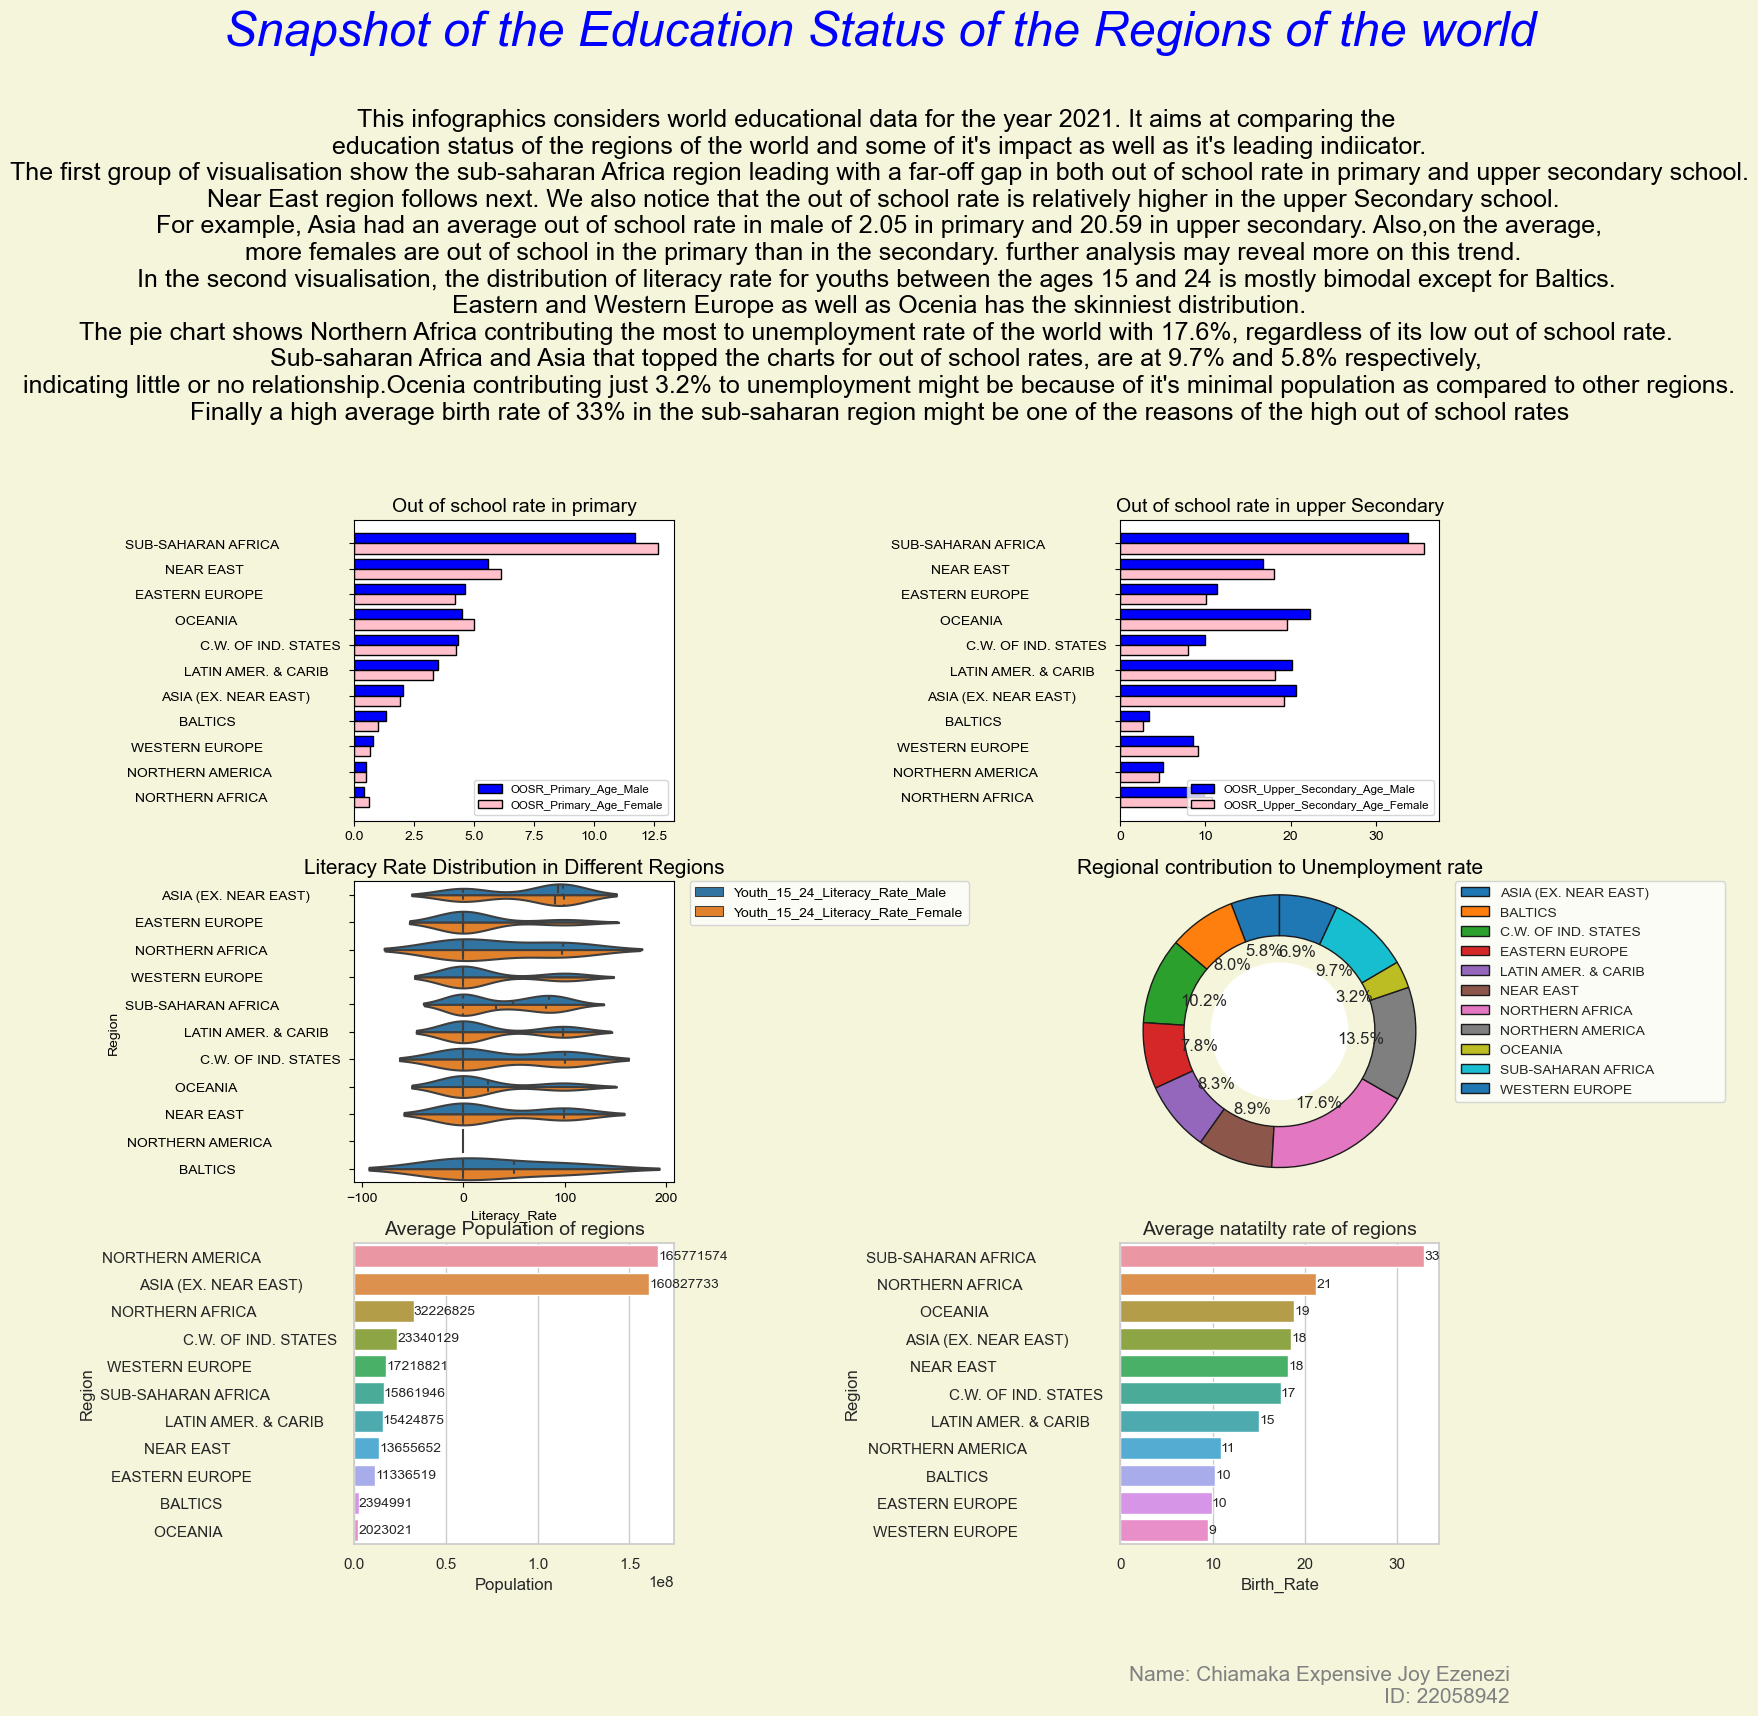

In [1]:
"""DHV project - Infographics
created by Chiamaka"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

def generate_horizontal_multiple_bar_charts(data, column_names, title, 
                    bar_width=0.4, colors=None, ax=None):
    """
    Generate horizontal multiple bar charts from specified columns in a dataset.

    Parameters:
        data (pandas.DataFrame): The input dataset.
        column_names (list): A list of column names to generate bar charts.
        bar_width (float): Width of each bar. Default is 0.4.
        title(str): title of the plot
        colors (list): A list of colors for each bar. 
        Default is None (uses default colors).
        ax (matplotlib.axes._subplots.AxesSubplot): AxesSubplot to use for plotting.

    Returns:
        None
    """
    num_charts = len(column_names)
    num_bars = len(data)

    if ax is None:
        fig, ax = plt.subplots()

    bar_positions = np.arange(num_bars)

    for i in range(num_charts):
        if colors:
            bars = ax.barh(bar_positions + i * bar_width, data[column_names[i]],
         height=bar_width, label=column_names[i], color=colors[i % len(colors)], edgecolor='black')
        else:
            bars = ax.barh(bar_positions + i * bar_width, data[column_names[i]],
            height=bar_width, label=column_names[i], edgecolor='black')

    ax.set_yticks(bar_positions + (bar_width * (num_charts - 1)) / 2)
    ax.set_yticklabels(data.index)
    ax.invert_yaxis()  # Invert y-axis to have the first row at the top
    ax.legend(fontsize='small')
    ax.set_title(title, fontsize=14)
    
    return


def create_exploding_pie_chart_seaborn(data, column_name, title, ax=None):
    """
    Create an exploding pie chart from a column of a dataset using Seaborn.

    Parameters:
        data (pandas.DataFrame): The input dataset.
        column_name (str): The name of the column to use for the pie chart.
        title(str): title of the plot
        ax (matplotlib.axes._subplots.AxesSubplot): AxesSubplot to use for plotting.

    Returns:
        None
    """
    # Extract the specified column data
    column_data = data[column_name]

    # Calculate the percentage of each wedge
    total = sum(column_data)
    percentages = [value / total * 100 for value in column_data]

    # Define the explode parameter (0.1 for the first wedge, 0 for the rest)
    explode = [0.5 if i == column_data.idxmax() else 0 for i in range(len(column_data))]

    # Plot the exploding pie chart using Seaborn
    if ax is None:
        fig, ax = plt.subplots()

    sns.set(style="whitegrid")
    ax.pie(column_data, autopct='%1.1f%%', startangle=90, explode=explode,
            wedgeprops=dict(width=0.3, edgecolor='k'))

    centre_circle = plt.Circle((0, 0), 0.50, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that the pie chart is drawn as a circle
    ax.axis('equal')
    ax.set_title(title, fontsize=15)
    legend_labels = data.index
    ax.legend(labels=legend_labels, bbox_to_anchor=(1.05, 1),
              loc=2, borderaxespad=0., fontsize='small')

    return


def barplot(x_columnname, y_columnname, data, title, ax=None):
    """
    Plots a bar chart with values shown at the height positions.

    Parameters:
        x_columnname (str): Column to plot on x-axis.
        y_columnname (str): Column to plot on y-axis.
        data (dataframe): Input data to plot from.
        title (str): Title of the plot.
        ax (matplotlib.axes._subplots.AxesSubplot): AxesSubplot to use for plotting.

    Returns:
        None
    """

    if ax is None:
        fig, ax = plt.subplots()

    # Plot the bar chart
    sns.barplot(x=x_columnname, y=y_columnname, data=data, ax=ax)

    # Annotate each bar with its height value
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)

    ax.set_xlabel(f"{x_columnname}")
    ax.set_title(title, fontsize=14)

    return ax


# main body of code
# read in the data files
Global_edu_data = pd.read_excel("Global_Education.xlsx")
region_data = pd.read_excel("countries of the world.xlsx")

# data cleaning
Global_edu_data = Global_edu_data.drop(["Latitude ", "Longitude"], axis=1)
Global_edu_data = Global_edu_data.dropna()
Global_edu_data.rename(columns={"Countries and areas": "Country"},
                       inplace=True)
region_data['Country'] = region_data['Country'].str.strip()
# merge the two datasets
Global_edu_data_region_merged = pd.merge(Global_edu_data, region_data)

Global_edu_data_region_merged.columns
Global_edudata_grouped_by_region = Global_edu_data_region_merged.groupby(
    "Region").mean()
Global_edudata_grouped_by_region = Global_edudata_grouped_by_region.astype(
    "float")

title_text = ("Snapshot of the Education Status of the Regions of the world")
abstract_text = ("This infographics considers world educational data for "
                 "the year 2021. It aims at comparing the \neducation status "
                 "of the regions of the world and some of it's impact as well"
                 " as it's leading indiicator.\n"
                 "The first group of visualisation show the sub-saharan Africa"
                 " region leading with a far-off gap in both out of school rate"
                 " in primary and upper secondary school.\n Near East region"
                 " follows next. We also notice that the out of school rate "
                 "is relatively higher in the upper Secondary school.\n"
                 "For example, Asia had an average out of school rate in male "
                 "of 2.05 in primary and 20.59 in upper secondary. Also,on the "
                 "average,\n more females are out of school in the primary than "
         "in the secondary. further analysis may reveal more on this trend.\n"
         "In the second visualisation, the distribution of literacy rate "
                 "for youths between the ages 15 and 24 is mostly bimodal "
                 "except for Baltics. \nEastern and Western Europe as well as "
                 "Ocenia has the skinniest distribution.\n"
             "The pie chart shows Northern Africa contributing the most to "
             "unemployment rate of the world with 17.6%, regardless of its "
            "low out of school rate. \nSub-saharan Africa and Asia that "
             "topped the charts for out of school rates, are at 9.7% and"
                " 5.8% respectively, \nindicating little or no relationship."
            "Ocenia contributing just 3.2% to unemployment might be because"
                 " of it's minimal population as compared to other regions.\n"
                "Finally a high average birth rate of 33% in the sub-saharan "
         "region might be one of the reasons of the high out of school rates")

identity_text = ('Name: Chiamaka Expensive Joy Ezenezi\n'
                  'ID: 22058942')
# calling functions to plot data
#setting plots positions
fig = plt.figure(figsize=(14, 18))
gs = gridspec.GridSpec(4, 3)


fig.text(0.5, 0.95, title_text, ha='center', va='center', fontsize=35,
         color='blue', fontstyle='italic')
abstract_height = 0.1
# Add abstract text below the title
fig.text(0.5, 0.92 - abstract_height, abstract_text, ha='center', va='center',
         fontsize=18, wrap=True)
fig.text(0.95, 0.02, identity_text, ha='right', va='bottom', fontsize=15,
         color='gray')
# multiple bar charts
columns_to_plot = ['OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female']
data = Global_edudata_grouped_by_region
sorted_data = data.sort_values(by=columns_to_plot, ascending=False)

generate_horizontal_multiple_bar_charts(sorted_data, columns_to_plot,
    title="Out of school rate in primary", colors=['blue', 'pink'], 
    ax=plt.subplot(gs[1, 0]))

columns_to_plot = ['OOSR_Upper_Secondary_Age_Male',
                   'OOSR_Upper_Secondary_Age_Female']
generate_horizontal_multiple_bar_charts(sorted_data, columns_to_plot,
     title="Out of school rate in upper Secondary", colors=['blue', 'pink'],
     ax=plt.subplot(gs[1, 2]))
# Combine male and female literacy rates into a single column 
your_data_melted = pd.melt(Global_edu_data_region_merged, id_vars=['Region'],
    value_vars=["Youth_15_24_Literacy_Rate_Male", 
    "Youth_15_24_Literacy_Rate_Female"], var_name='Gender', 
    value_name='Literacy_Rate')

# Create a violin plot
sns.violinplot(y='Region', x='Literacy_Rate', hue='Gender',
               data=your_data_melted, split=True, inner="quart",
               ax=plt.subplot(gs[2, 0:1]))
plt.subplot(gs[2, 0:1]).set_title('Literacy Rate Distribution in Different Regions',
                                  fontsize=15)
plt.subplot(gs[2, 0:1]).set_ylabel('Region'),
plt.subplot(gs[2, 0:1]).legend( bbox_to_anchor=(1.05, 1), loc=2,
                                   borderaxespad=0.)

#pie chart
create_exploding_pie_chart_seaborn(Global_edudata_grouped_by_region,
     "Unemployment_Rate", title='Regional contribution to Unemployment rate',
     ax=plt.subplot(gs[2,2]))

#bar charts
data = Global_edudata_grouped_by_region
sorted_data = data.sort_values(by='Population', ascending=False)


barplot('Population', y_columnname=sorted_data.index, data=sorted_data,
        title='Average Population of regions', ax=plt.subplot(gs[3,0]))

data = Global_edudata_grouped_by_region
sorted_data = data.sort_values(by='Birth_Rate', ascending=False)


barplot('Birth_Rate', y_columnname=sorted_data.index, data=sorted_data,
        title='Average natatilty rate of regions', ax=plt.subplot(gs[3, 2]))

    
#fig.suptitle("Snapshot of the educational level of the regions of the world",
             #fontsize=35)
fig.set_facecolor('beige')


plt.show()
